# **Rodrigo_Mesquita_DR2_AT**
## **Coleta de Dados com Python via APIs e WebScraping [24E3_2]**

### Notebook e arquivos disponíveis em: https://github.com/rodrigo1992-cmyk/DR2_AT

# Docs e Regex


## Exercício 1: 
Baixe seu perfil no Linkedin em PDF e utilize o PyPDF2 para construir uma função que retorne a string do texto completo do documento.


In [112]:
%pip install -U PyPDF2

Note: you may need to restart the kernel to use updated packages.


In [113]:
import PyPDF2 as pdf

def import_pdf(pdf_path):
    with open (pdf_path, 'rb') as file:
        content = pdf.PdfReader(file)

        text = ''

        for page in content.pages:
            text += page.extract_text() + "\n"
        
    return text

pdf_path = 'data/linkedin_profile.pdf'

text = import_pdf(pdf_path)
print(text)

   
Contato
Rio de Janeiro, RJ - Brasil
(21) 98113-5927  (Mobile)
rodrigomesquita0@gmail.com
www.linkedin.com/in/rodrigo-
mesquita-6120b193  (LinkedIn)
Principais competências
Inglês
Scikit-Learn
SciPy
Languages
Inglês  (Professional Working)Rodrigo Mesquita
Tech Lead | Espec. Sr. em Analytics & BI | Cientista de Dados | MBA
Eng. de Softwares | MBA Gestão Empresarial
Rio de Janeiro, Rio de Janeiro, Brasil
Resumo
Profissional de Dados focado em empresas de tecnologia e
consultoria, com sólida experiência em gerenciamento de projetos
de Business Intelligence e automação de processos analíticos.
Lider de uma célula de análise de dados avançadas na TIM
Brasil, buscando a democratização do acesso a dados através
da capacitação e orientação das áreas de negócio, auxiliando a
empresa a construir uma forte cultura data-driven.
Cursando segunda graduação, em Data Science pelo Instituto
Infnet, além de possuir MBA em Engenharia de Software pela UFRJ,
MBA em Gestão Empresarial pela Universidade C

## Exercício 2:
Utilize Regex (módulo `re` nativo do Python) para criar uma função que, a partir do texto extraído, retorne um dicionário com as seguintes informações: 
* Seu número de telefone;
* Seu endereço de email; e 
* O link do seu perfil no Linkedin.

In [114]:
import re

def linkedin_reg(text):
    dic={}

    telefone = re.search(r'\([0-9]+\)\s[0-9]*-[0-9]*\s+\(Mobile\)',text).group()
    telefone = re.sub(r'\s+\(Mobile\)', '', telefone)

    email = re.search(r'\w+(\.)?\w+@\w+',text).group() + '.com'
    
    linkedin = re.search(r'www\.linkedin\.com\S+\n\S+',text).group()
    linkedin = linkedin.replace('\n','')

    dic = {'telefone':telefone, 'email':email, 'linkedin':linkedin}

    return dic

dic1 = linkedin_reg(text)
dic1

{'telefone': '(21) 98113-5927',
 'email': 'rodrigomesquita0@gmail.com',
 'linkedin': 'www.linkedin.com/in/rodrigo-mesquita-6120b193'}

## Exercício 3:

Aplique as funções geradas nas questões 1 e 2 para fazer o mesmo com o PDF em anexo (perfil do professor) e crie um CSV com as informações extraídas (colunas: nome, telefone, email e perfil) utilizando o módulo `csv` nativo do Python. Obs.: ao final os padrões utilizados no Regex devem abarcar os conteúdos dos dois PDFs.

In [115]:
import csv

pdf_path = 'data/linkedin_professor.pdf'

text = import_pdf(pdf_path)
dic2 = linkedin_reg(text)
dic2

{'telefone': '(51) 98128-0967',
 'email': 'viniciusbranco.ufrgs@gmail.com',
 'linkedin': 'www.linkedin.com/in/vinicius-br-sc(LinkedIn)'}

In [116]:

with open('data/linkedin.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(dic1.keys())
    writer.writerow(dic1.values())
    writer.writerow(dic2.values())


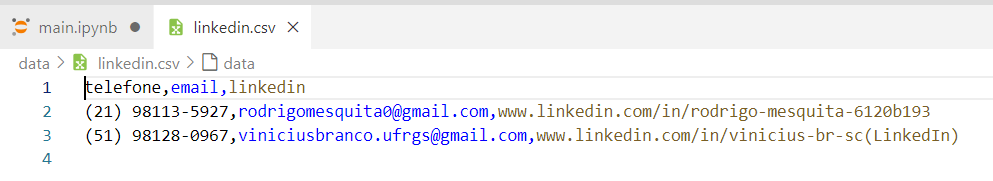

# APIs

## Exercício 4:

Explore o “playground” da API do SimilarWeb encontrada no RapidAPI (https://rapidapi.com/Glavier/api/similarweb12/playground/) e inscreva-se no plano gratuito, então crie um código para obter os dados dos 10 primeiros sites listados em “top-websites”, salvando-os em um dataframe do Pandas e enfim em um arquivo CSV usando o próprio Pandas.

In [123]:
import requests
import pandas as pd

url = "https://similarweb12.p.rapidapi.com/v3/top-websites/"

headers = {
    "x-rapidapi-key": "3d548dfb94msh2983fe233fc5869p15fdf5jsn4ff69403470e",
    "x-rapidapi-host": "similarweb12.p.rapidapi.com"
}

response = requests.get(url, headers=headers)

dados = response.json()

In [132]:
df = pd.DataFrame(dados['sites']).head(10)
df.to_csv('data/top_websites.csv', index=False)

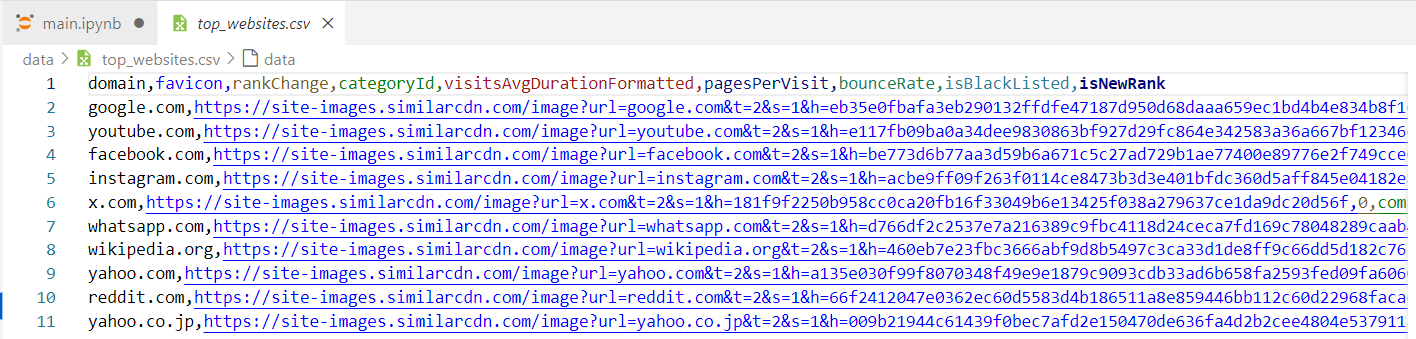

# XPath

## Exercício 5:

Utilize o arquivo XML em anexo e a biblioteca `lxml` com caminhos relativos de XPath para:

* Selecionar os nomes de todos *estudantes* que estejam no 2º ano ou acima dele;
* Selecionar o nome do *professor* de Estruturas de Dados (course: "Data Structures");
* Selecionar os títulos de todos os *cursos* ofertados pelo departamento de Ciência da Computação (department: Computer Science);
* Selecionar os nomes de todos os *departamentos* que sejam pertencentes à Escola de Engenharia (college: Engineering).

In [118]:
from lxml import etree

tree = etree.parse(r'data/AT.xml', parser=etree.XMLParser())
root = tree.getroot()

In [119]:
#Estudantes do 2° ano ou superior
estudantes = root.xpath('//student[@year >= 2]/text()')
estudantes

['Alice', 'Bob', 'Charlie', 'David', 'Grace', 'Henry', 'Isla', 'Jack']

In [120]:
#nome do professor de Estruturas de Dados
professores = root.xpath('//department/course[@code="CS202"]/professor/text()')
professores

['Dr. Emily Clark']

In [121]:
#cursos ofertados pelo departamento de Ciência da Computação
cursos = root.xpath('//department[@name="Computer Science"]/course/title/text()')
cursos

['Introduction to Computer Science', 'Data Structures']

In [122]:
#departamentos pertencentes à Escola de Engenharia
departamentos = root.xpath('//college[@name="Engineering"]/department/@name')
departamentos

['Computer Science', 'Mechanical Engineering']

# CSS

## Exercício 6:

Utilize o arquivo XML em anexo e a biblioteca `lxml` com seletores de CSS para:

* Selecionar os títulos de todos os cursos cujos professores possuem estabilidade (tenure);
* Selecionar os títulos de todos os cursos que possuem horário de início pela manhã (AM). 
  * Dica: cuidado com nomes antigos de pseudo-classes, caso algum não funcione tente o nome antigo.

In [ ]:
#%pip install cssselect==0.3

In [153]:
from lxml import etree

tree = etree.parse(r'data/AT.xml', parser=etree.XMLParser())
root = tree.getroot()

In [184]:
#cursos cujos professores possuem estabilidade
titulos_tenure = root.cssselect('professor[tenure="true"] ~ title')
for i in titulos_tenure:
    print(i.text)

Introduction to Computer Science
Thermodynamics
World History


In [219]:
#cursos que possuem horário de início pela manhã
cursos_manha = root.cssselect('course schedule time:contains("AM")')
for curso in cursos_manha:
    print(curso.getparent().getparent().find('title').text)

Introduction to Computer Science
Thermodynamics
World History
Ethics


# WebCrawling
## Exercício 7: 

Examine um site de sua escolha na lista de sites fornecida em anexo e descubra o padrão de URL para paginação que ele aceita. Então, utilize-o para obter uma lista de links de notícias requisitando as 2 primeiras páginas e raspando os links de cada uma através de um único seletor de CSS aplicado via `BeautifulSoup`.

In [93]:
#%pip install beautifulsoup4
from bs4 import BeautifulSoup
import requests
from datetime import datetime
import pytz
import pandas as pd

In [4]:
dados = ''
for i in range(1,3):
    url = f'https://bico24horas.com.br/noticias/cidades/29?pagina={i}'
    response = requests.get(url)
    dados += response.text

In [11]:
soup = BeautifulSoup(dados, 'html.parser')
conteudo = soup.select('#conteudo div.media-body a')

lista_urls = []
for link in conteudo:
    lista_urls.append('https://bico24horas.com.br' + link.get('href'))

lista_urls

['https://bico24horas.com.br/noticia/brk-ressalta-o-papel-fundamental-do-encanador-para-o-saneamento/39135',
 'https://bico24horas.com.br/noticia/sorte-na-conta-brk-inicia-campanha-com-diversos-sorteios-para-clientes-que-pagarem-faturas-no-pix/39128',
 'https://bico24horas.com.br/noticia/procon-encontra-variacao-de-ate-213-nos-precos-dos-produtos-da-cesta-basica-em-araguaina/39122',
 'https://bico24horas.com.br/noticia/eleicoes-2024-palmas-esta-entre-os-103-municipios-brasileiros-aptos-a-realizar-o-2o-turno/39072',
 'https://bico24horas.com.br/noticia/palmas-recebe-a-exposicao-historia-de-um-cajueiro-nesta-sexta-20-promovida-pela-brk/39057',
 'https://bico24horas.com.br/noticia/nossa-arte-festival-em-palmas-celebra-a-inclusao-social-de-alunos-especiais-por-meio-da-cultura/39023',
 'https://bico24horas.com.br/noticia/brk-apresenta-exposicao-imersiva-e-gratuita-a-historia-de-um-cajueiro/39019',
 'https://bico24horas.com.br/noticia/empresa-de-irmao-de-secretaria-troca-1-lote-por-43-de-pre

# WebScraping

## Exercício 8:

Faça um loop para os 3 primeiros links da lista obtida na questão anterior requisitando o HTML de cada página com a biblioteca que preferir (`urllib`, `requests`, etc.) e aplicando funções baseadas em `BeautifulSoup` para capturar e por fim salvar em um mesmo arquivo JSON, junto à URL de cada notícia e ao datetime do momento da requisição de cada página:

* O objeto datetime (timezone-aware) da data e hora da publicação da notícia;
* O título da notícia;
* O corpo do texto da notícia;
* O subtítulo da notícia (se houver);
* O autor ou autores da notícia (se houver).

In [149]:

dt_request,dt_noticia,titulo,corpo,subtitulo,autor = '', '', '', '', '', ''

df = pd.DataFrame(columns=['url','dt_request','dt_noticia','titulo','corpo','subtitulo','autor'])

#Itero uma vez para cada uma das 3 primeiras URLs
for i in range(0,3):
    url = lista_urls[i]
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    dt_request = datetime.now(pytz.utc).isoformat()
    dt_noticia = soup.select_one('div.col-lg-10 small').text
    dt_noticia = datetime.strptime(dt_noticia, '%d/%m/%Y - %Hh%Mm').isoformat()
    titulo = soup.find('meta', attrs={'property': 'og:title'}).get('content')
    corpo_lista = soup.select('#texto > p:nth-child(n+3)')
    #O comando select retorna uma lista, por isso precisei concatenar os textos
    corpo = ''.join([p.text for p in corpo_lista])
    subtitulo = soup.find('meta', attrs={'property': 'og:description'}).get('content')
    autor = soup.select_one('#conteudo > small:nth-child(4)').text


    linha = pd.DataFrame({
        'url': [url],
        'dt_request': [dt_request],
        'dt_noticia': [dt_noticia],
        'titulo': [titulo],
        'corpo': [corpo],
        'subtitulo': [subtitulo],
        'autor': [autor]
        })

    df = pd.concat([df, linha], ignore_index=True)

df

,url,dt_request,dt_noticia,titulo,corpo,subtitulo,autor
0,https://bico24horas.com.br/noticia/brk-ressalt...,2024-09-28T03:03:44.816490+00:00,2024-09-27T11:10:00,BRK ressalta o papel fundamental do encanador ...,"No Dia do Encanador, comemorado em 27 de setem...",Concessionária destaca a importância desses pr...,Por Bico 24 Horas
1,https://bico24horas.com.br/noticia/sorte-na-co...,2024-09-28T03:03:44.982739+00:00,2024-09-26T14:21:00,Sorte na Conta: BRK inicia campanha com divers...,"A BRK, uma das principais empresas de saneamen...","Em sua 2ª edição, campanha ""Sorte na Conta"" ir...",Por Bico 24 Horas
2,https://bico24horas.com.br/noticia/procon-enco...,2024-09-28T03:03:45.307587+00:00,2024-09-26T09:35:00,Procon encontra variação de até 213% nos preço...,O Procon Tocantins divulga os resultados de pe...,Maior variação encontrada foi no pacote de sal...,Por Bico 24 Horas


In [150]:
#Exportando o resultado para Json
df.to_json('data/noticias.json', indent=4, orient='records', force_ascii=False)

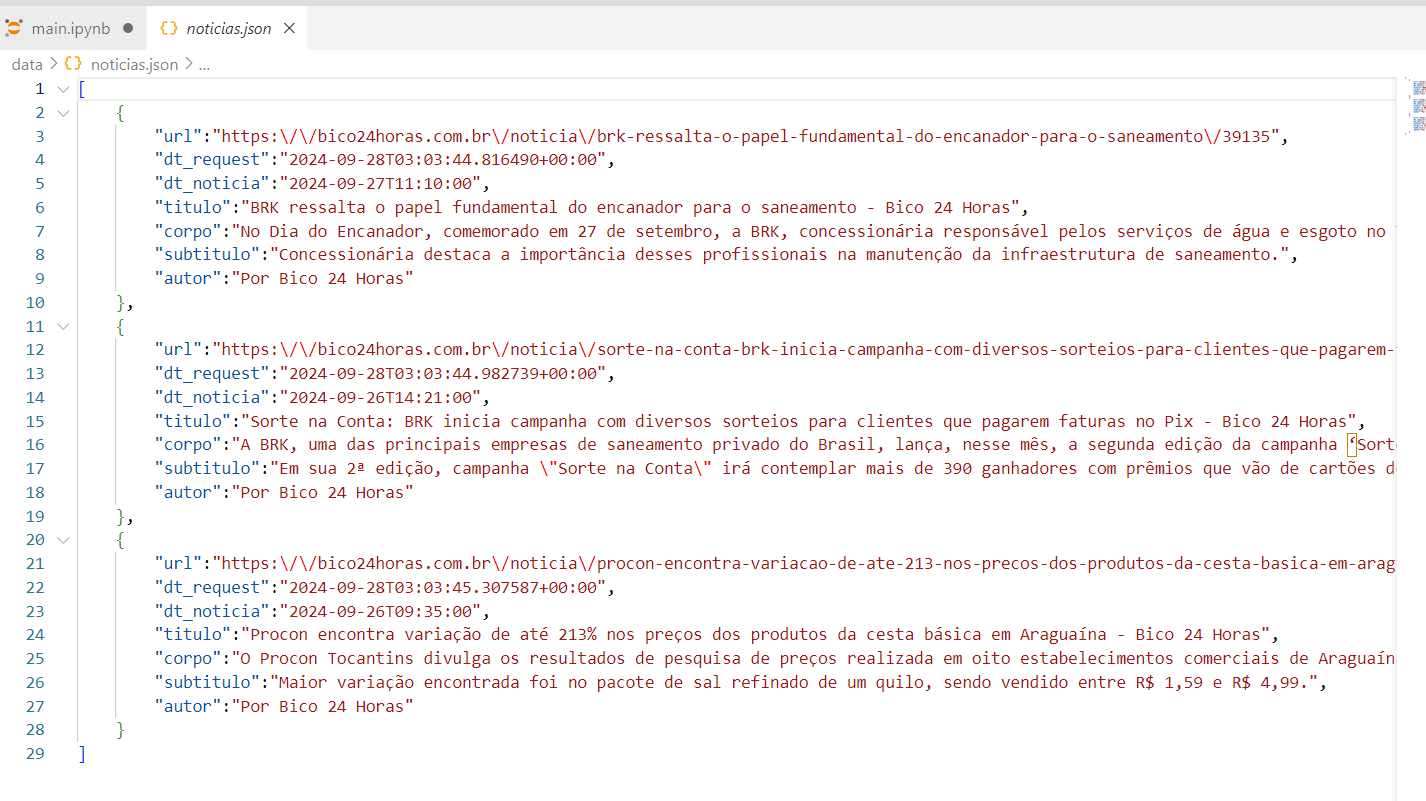

# Scrapy

## Exercício 9:

Escolha um dos sites da lista fornecida (que não tenha sido escolhido nas anteriores) para montar um projeto no Scrapy que abarque tanto o Crawling quanto o Scraping, a fim de rodá-lo tal como na questão anterior.

In [ ]:
# Abaixo colei o código do Scrapy, contido no arquivo "data/noticias/noticias/spiders/noticias.py"
# O resultado pode ser conferido no arquivo "data/noticias/rondoniadinamica.json"

import scrapy
import pytz
from datetime import datetime

class noticias(scrapy.Spider):
    name = 'noticias'
    start_urls = ['https://www.rondoniadinamica.com/']

    def parse(self, response):
        #obtendo o link das notícias mais populares
        links = response.css('div.popular-news-widget')
        urls = links.css('a::attr(href)').getall()

        #iterando sobre os 3 primeiros links
        for url in urls[:3]:
            url_completa = response.urljoin(url)
            yield scrapy.Request(url_completa, callback=self.obter_campos)
    
    #função para obter os campos de cada notícia
    def obter_campos(self, response):
        dt_request = datetime.now(pytz.utc).isoformat()
        dt_noticia = response.css('div.post-excerp strong::text').getall()[1]
        dt_noticia_tratada = datetime.strptime(dt_noticia, "%d/%m/%Y às %Hh%M").isoformat()
        titulo = response.css('meta[property="og:title"]::attr(content)').get()
        corpo = response.css('div.post-meta p::text').getall()
        subtitulo = response.css('meta[property="og:description"]::attr(content)').get()
        autor = response.css('meta[name="author"]::attr(content)').get()

        yield {
            'url': response.url,
            'dt_request': dt_request,
            'dt_noticia': dt_noticia_tratada,
            'titulo': titulo,
            'corpo': corpo,
            'subtitulo': subtitulo,
            'autor': autor
        }


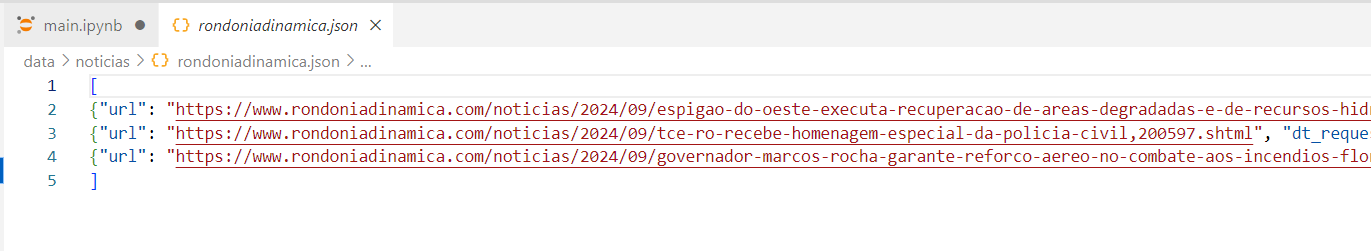

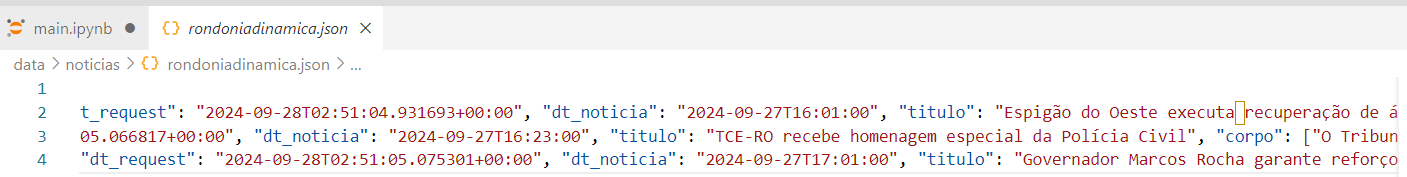

# Selenium

## Exercício 10:
Extraia uma lista de empregos do site https://br.indeed.com. Extraia os títulos dos empregos da primeira página de resultados ao pesquisar por "Data Scientist" na área da capital de seu estado. O site usa JavaScript para carregar as listas dinamicamente, o que significa que você não pode recuperar esses dados simplesmente usando solicitações ou BeautifulSoup. Escreva um script em Python usando Selenium para extrair os títulos dos empregos desta página junto a outras informações que você considere relevante.

In [ ]:
#%pip install selenium

In [40]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import time

driver = webdriver.Firefox()
driver.get("https://br.indeed.com")


In [41]:
#Comandos na página inicial
campo_cargo = driver.find_element(By.ID, "text-input-what")
campo_local = driver.find_element(By.ID, "text-input-where")
botao_buscar = driver.find_element(By.CSS_SELECTOR, "button[type=submit]")

campo_cargo.clear()
campo_cargo.send_keys("Data Scientist")

campo_local.clear()
campo_local.send_keys("Rio de Janeiro,RJ")

botao_buscar.click()

In [50]:
#Comandos na página de resultados

#As vezes aparecia um pop-up, então adicionei um comando para fechar ele
time.sleep(5)
try:
    botao_buscar = driver.find_element(By.CSS_SELECTOR, "button[aria-label=fechar]")
    botao_buscar.click()
except:
    pass

#Coleta todas as tags contidas dentro da cada card
div_vagas = driver.find_elements(By.CSS_SELECTOR, "div.job_seen_beacon")

#Itera sobre cada card para coletar as informações
for vaga in div_vagas:
    titulo_vaga = vaga.find_element(By.CSS_SELECTOR, "h2.jobTitle").text
    empresa = vaga.find_element(By.CSS_SELECTOR, "span[data-testid=company-name]").text
    local = vaga.find_element(By.CSS_SELECTOR, "div[data-testid=text-location]").text

    #Acessa cada vaga para coletara descrição completa da vaga
    titulo_clicavel = driver.find_element(By.CSS_SELECTOR, "a.jcs-JobTitle[role=button]")
    titulo_clicavel.click()
    time.sleep(2)
    descricao = driver.find_element(By.CSS_SELECTOR, "div.jobsearch-JobComponent-description[id=jobDescriptionText]").text

    print(f"Título: {titulo_vaga}")
    print(f"Empresa: {empresa}")
    print(f"Local: {local}")
    print(f"Descrição: {descricao}\n")

Título: Senior Data Scientist - Product and Experimentation
Empresa: Xometry Inc
Local: Home Office in Rio de Janeiro, RJ
Descrição: Xometry (NASDAQ: XMTR) powers the industries of today and tomorrow by connecting the people with big ideas to the manufacturers who can bring them to life. Xometry’s digital marketplace gives manufacturers the critical resources they need to grow their business while also making it easy for buyers at Fortune 1000 companies to tap into global manufacturing capacity.
Xometry is adding a Senior Data Scientist to our Data Science team. The ideal candidate will have a passion for using data science techniques to solve large-scale business problems. Additionally, this person will use their knowledge of probability and statistics to make defensible statistical inferences from data. This is a 1-year contract.
Responsibilities:
Use data analysis and visualizations (examples include Looker, Jupyter Notebooks, Python, Pandas) to inform the business strategy for cost

In [ ]:
driver.quit()